In [109]:
import os
import math

import skimage.feature
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.cluster import KMeans

Number of Points: 1751


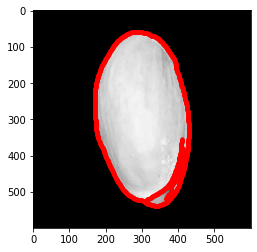

In [292]:
og_im = plt.imread("Siirt_Pistachio/siirt (9).jpg")
rgb_im = np.array(og_im)
hsv_im = cv2.cvtColor(rgb_im, cv2.COLOR_RGB2HSV)
im = rgb2gray(rgb_im)
edgeIm = skimage.feature.canny(im, sigma=3)
cord = np.argwhere(edgeIm)

## convert the indexes to x-y cordinates
# TODO noOfPoints = ??
noOfPoints = cord.shape[0]

# get X and Y through vectorized index access instead of for loop
X = cord[:, 1]
Y = cord[:, 0]

# Print the number of points
print(f'Number of Points: {noOfPoints}')

# display the image and plot the edge coordinates
## display the image 
plt.imshow(im, cmap="gray") 
plt.plot(X, Y, 'r.')
plt.show()

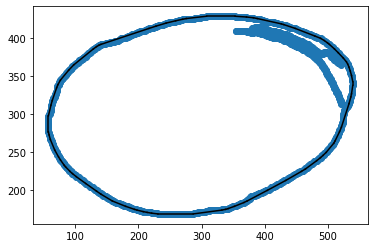

In [295]:
from scipy.spatial import ConvexHull as ch
hull = ch(cord)
import matplotlib.pyplot as plt
plt.plot(cord[:,0], cord[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cord[simplex, 0], cord[simplex, 1], 'k-')

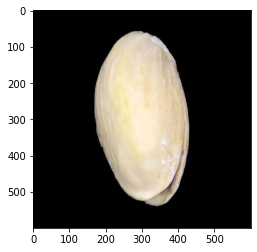

In [200]:
plt.imshow(og_im)

In [205]:
pistachio_cords = np.argwhere(im > 0)
pistachio_pixs = rgb_im[pistachio_cords[:, 0], pistachio_cords[:, 1]]
pistachio_hsv = hsv_im[pistachio_cords[:, 0], pistachio_cords[:, 1]]
# pistachio_hsv
X = pistachio_hsv.reshape(-1, 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
results = kmeans.labels_
# results.shape, pistachio_pixs.shape

In [206]:
unique, counts = np.unique(results, return_counts=True)

argsort = unique[np.argsort(counts)]
nut = unique[argsort[1]]
shell = unique[argsort[2]]
# nut = unique[argsort[0]]
# shell = unique[argsort[1]]
# black = unique[argmax]
# shell = unique[[i for i in range(len(unique)) if i != argmin and i != argmax][0]]
unique, counts, unique[np.argsort(counts)], counts[np.argsort(counts)]

(array([0, 1, 2], dtype=int32),
 array([95339,  5860,  3895]),
 array([2, 1, 0], dtype=int32),
 array([ 3895,  5860, 95339]))

85.01576829349304 85.0
98.16851096263508 103.92798634812287


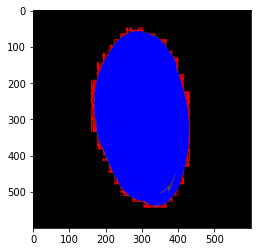

In [207]:
shell_cords = pistachio_cords[np.argwhere(results == shell).flatten()]
nut_cords = pistachio_cords[np.argwhere(results == nut).flatten()]

shell_pixs = rgb_im[shell_cords[:, 0], shell_cords[:, 1]]
shell_hsv = hsv_im[shell_cords[:, 0], shell_cords[:, 1]]
nut_pixs = rgb_im[nut_cords[:, 0], nut_cords[:, 1]]
nut_hsv = hsv_im[nut_cords[:, 0], nut_cords[:, 1]]

print(shell_pixs.mean(), nut_pixs.mean())
print(shell_hsv.mean(), nut_hsv.mean())

rgb_im[shell_cords[:, 0], shell_cords[:, 1]] = np.array([0, 0, 255])
rgb_im[nut_cords[:, 0], nut_cords[:, 1]] = np.array([255, 0, 0])
plt.imshow(rgb_im)



In [219]:
og_im = plt.imread("Siirt_Pistachio/siirt (1).jpg")
rgb_im = np.array(og_im)
hsv_im = cv2.cvtColor(rgb_im, cv2.COLOR_RGB2HSV)
im = rgb2gray(rgb_im)

pistachio_cords = np.argwhere(im > 0)
pistachio_pixs = rgb_im[pistachio_cords[:, 0], pistachio_cords[:, 1]]
pistachio_hsv = hsv_im[pistachio_cords[:, 0], pistachio_cords[:, 1]]

X = pistachio_hsv.reshape(-1, 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
results = kmeans.labels_

unique, counts = np.unique(results, return_counts=True)
argsort = unique[np.argsort(counts)]
shell = unique[argsort[2]]
shell_count = counts[argsort[2]]
nut = unique[argsort[1]]
nut_count = counts[argsort[1]]

shell_cords = pistachio_cords[np.argwhere(results == shell).flatten()]
nut_cords = pistachio_cords[np.argwhere(results == nut).flatten()]


# print(shell_count, nut_count)

# print(shell_pixs.mean(), nut_pixs.mean())
# print(np.median(shell_pixs), np.median(nut_pixs))
# print(shell_pixs.mean(axis=0), nut_pixs.mean(axis=0))
# print(np.median(shell_pixs, axis=0), np.median(nut_pixs, axis=0))

# print(shell_hsv.mean(axis=0), nut_hsv.mean(axis=0))
# print(np.median(shell_hsv, axis=0), np.median(nut_hsv, axis=0))


# n = 100
# random_shell_indices = np.random.choice(len(shell_cords), size=n, replace=False)
# n_shell_cords = shell_cords[random_shell_indices, :]
# n_nut_cords = nut_cords[random_nut_indices, :]

# rgb_im[shell_cords[:, 0], shell_cords[:, 1]] = np.array([0, 0, 255])
# rgb_im[nut_cords[:, 0], nut_cords[:, 1]] = np.array([255, 0, 0])
# plt.imshow(rgb_im)

def _get_mean_med_helper(shell_pixs, shell_hsv, nut_pixs, nut_hsv):
    return [shell_pixs.mean(), nut_pixs.mean(), np.median(shell_pixs), np.median(nut_pixs)] + \
list(shell_pixs.mean(axis=0)) + list(nut_pixs.mean(axis=0)) + \
list(np.median(shell_pixs, axis=0)) + list(np.median(nut_pixs, axis=0))

# def get_mean_med(shell_cords, nut_cords, rgb_im, hsv_im, include_n=None):
shell_pixs = rgb_im[shell_cords[:, 0], shell_cords[:, 1]]
shell_hsv = hsv_im[shell_cords[:, 0], shell_cords[:, 1]]
nut_pixs = rgb_im[nut_cords[:, 0], nut_cords[:, 1]]
nut_hsv = hsv_im[nut_cords[:, 0], nut_cords[:, 1]]

shell_pixs_mean, nut_pixs_mean, shell_pixs_med, nut_pixs_med, \
shell_r_mean, shell_g_mean, shell_b_mean, \
nut_r_mean, nut_g_mean, nut_b_mean, \
shell_r_med, shell_g_med, shell_b_med, \
nut_r_med, nut_g_med, nut_b_med = _get_mean_med_helper(shell_pixs, shell_hsv, nut_pixs, nut_hsv)

n = 100
random_shell_indices = np.random.choice(len(shell_cords), size=n, replace=False)
random_nut_indices = np.random.choice(len(nut_cords), size=n, replace=False)
n_shell_cords = shell_cords[random_shell_indices, :]
n_nut_cords = nut_cords[random_nut_indices, :]

n_shell_pixs = rgb_im[n_shell_cords[:, 0], n_shell_cords[:, 1]]
n_shell_hsv = hsv_im[n_shell_cords[:, 0], n_shell_cords[:, 1]]
n_nut_pixs = rgb_im[n_nut_cords[:, 0], n_nut_cords[:, 1]]
n_nut_hsv = hsv_im[n_nut_cords[:, 0], n_nut_cords[:, 1]]

n_shell_pixs_mean, n_nut_pixs_mean, n_shell_pixs_med, n_nut_pixs_med, \
n_shell_r_mean, n_shell_g_mean, n_shell_b_mean, \
n_nut_r_mean, n_nut_g_mean, n_nut_b_mean, \
n_shell_r_med, n_shell_g_med, n_shell_b_med, \
n_nut_r_med, n_nut_g_med, n_nut_b_med = _get_mean_med_helper(n_shell_pixs, n_shell_hsv, n_nut_pixs, n_nut_hsv)
    
print(shell_pixs_mean, nut_pixs_mean, shell_pixs_med, nut_pixs_med, \
shell_r_mean, shell_g_mean, shell_b_mean, \
nut_r_mean, nut_g_mean, nut_b_mean, \
shell_r_med, shell_g_med, shell_b_med, \
nut_r_med, nut_g_med, nut_b_med)

print(n_shell_pixs_mean, n_nut_pixs_mean, n_shell_pixs_med, n_nut_pixs_med, \
n_shell_r_mean, n_shell_g_mean, n_shell_b_mean, \
n_nut_r_mean, n_nut_g_mean, n_nut_b_mean, \
n_shell_r_med, n_shell_g_med, n_shell_b_med, \
n_nut_r_med, n_nut_g_med, n_nut_b_med)


212.20600673203333 144.61348959038975 217.0 143.0 223.10166428562707 213.85145976043077 199.66489615004213 160.3682427855304 129.76981438829426 143.70241159734454 231.0 219.0 205.0 160.0 128.0 143.0
212.68666666666667 140.24 216.5 142.5 224.45 214.08 199.53 155.9 125.4 139.42 232.5 219.0 205.0 159.5 126.5 142.5


In [217]:
a, b, c = list(np.array([1, 2])) +  [3]

In [198]:
X = rgb_im.reshape(-1, 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
results = kmeans.labels_

In [185]:
unique, counts = np.unique(results, return_counts=True)

argmin = np.argmin(counts)
argmax = np.argmax(counts)
nut = unique[argmin]
black = unique[argmax]
shell = unique[[i for i in range(len(unique)) if i != argmin and i != argmax][0]]
unique, counts, black, nut

(array([0, 1, 2], dtype=int32), array([254369,  90926,  14705]), 0, 2)

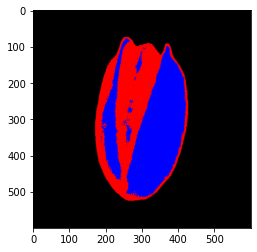

In [146]:
types = results.reshape(600, 600)
shell_cords = np.argwhere(types == shell)
nut_cords = np.argwhere(types == nut)
rgb_im[shell_cords[:, 0], shell_cords[:, 1]] = np.array([0, 0, 255])
rgb_im[nut_cords[:, 0], nut_cords[:, 1]] = np.array([255, 0, 0])
plt.imshow(rgb_im)

In [27]:
rgb_im = np.array(og_im)
print(rgb_im.shape)
print(im.shape)
pistachio_cords = np.argwhere(im > im.mean())
pistachio_pixs = rgb_im[pistachio_cords[:, 0], pistachio_cords[:, 1]]
pistachio_pixs_means = pistachio_pixs.mean(axis=1)
pistachio_pixs_norm = pistachio_pixs/pistachio_pixs.max(axis=1).reshape(-1, 1)
pistachio_pixs_norm_mins = pistachio_pixs_norm.min(axis=1)

percentile_cutoff = 25
norm_mins_cutoff = np.percentile(pistachio_pixs_norm_mins, percentile_cutoff)
mean_cutoff = np.percentile(pistachio_pixs_means, percentile_cutoff)
cutoff = (pistachio_pixs_norm_mins < norm_mins_cutoff) & (pistachio_pixs_means < mean_cutoff)

pistachio_pixs_shell = pistachio_pixs[~cutoff]
pistachio_pixs_nut = pistachio_pixs[cutoff]

pistachio_cords_shell = pistachio_cords[~cutoff]
pistachio_cords_nut = pistachio_cords[cutoff]
rgb_im[pistachio_cords_shell[:, 0], pistachio_cords_shell[:, 1]] = np.array([0, 0, 255])
rgb_im[pistachio_cords_nut[:, 0], pistachio_cords_nut[:, 1]] = np.array([255, 0, 0])

(600, 600, 3)
(600, 600)


array([215.51150967, 203.3155712 , 193.59923036])

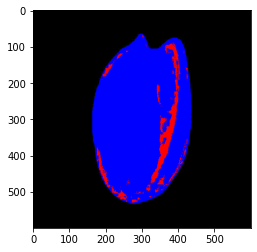

In [28]:
plt.imshow(rgb_im)
pistachio_pixs.mean(axis=0)

In [4]:
# read input
img = cv2.imread("Siirt_Pistachio/siirt (1).jpg")

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray, 100 , 255, cv2.THRESH_BINARY)[1]

# find largest contour
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# fit contour to ellipse and get ellipse center, minor and major diameters and angle in degree 
ellipse = cv2.fitEllipse(big_contour)
(xc,yc),(d1,d2),angle = ellipse
# print(xc,yc,d1,d1,angle)

# draw ellipse
result = img.copy()
cv2.ellipse(result, ellipse, (0, 255, 0), 3)

# draw circle at center
xc, yc = ellipse[0]
cv2.circle(result, (int(xc),int(yc)), 10, (255, 0, 0), 20)

# draw vertical line
# compute major radius
rmajor = max(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
# print(angle)
xtop_major = xc + math.cos(math.radians(angle))*rmajor
ytop_major = yc + math.sin(math.radians(angle))*rmajor
xbot_major = xc + math.cos(math.radians(angle+180))*rmajor
ybot_major = yc + math.sin(math.radians(angle+180))*rmajor
cv2.line(result, (int(xtop_major),int(ytop_major)), (int(xbot_major),int(ybot_major)), (0, 0, 255), 3)

# draw vertical line
# compute minor radius
rminor = min(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
# print(angle)
xtop_minor = xc + math.cos(math.radians(angle))*rminor
ytop_minor = yc + math.sin(math.radians(angle))*rminor
xbot_minor = xc + math.cos(math.radians(angle+180))*rminor
ybot_minor = yc + math.sin(math.radians(angle+180))*rminor
cv2.line(result, (int(xtop_minor),int(ytop_minor)), (int(xbot_minor),int(ybot_minor)), (0, 0, 255), 3)

cv2.imwrite("test_ellipse.jpg", result)


(600, 600)


KeyboardInterrupt: Interrupted by user

In [276]:
def process_ellipse(fname):
    # read input
    img = cv2.imread(fname)

    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold
    thresh = cv2.threshold(gray, 100 , 255, cv2.THRESH_BINARY)[1]

    # find largest contour
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    # fit contour to ellipse and get ellipse center, minor and major diameters and angle in degree 
    ellipse = cv2.fitEllipse(big_contour)
    (xc,yc),(d1,d2),angle = ellipse
#     print(xc,yc,d1,d1,angle)

    # draw ellipse
    result = img.copy()
    cv2.ellipse(result, ellipse, (0, 255, 0), 3)

    # draw circle at center
    xc, yc = ellipse[0]
    cv2.circle(result, (int(xc),int(yc)), 10, (255, 0, 0), 20)

    # draw vertical line
    # compute major radius
    rmajor = max(d1,d2)/2
    if angle > 90:
        angle = angle - 90
    else:
        angle = angle + 90
#     print(angle)
    xtop_major = xc + math.cos(math.radians(angle))*rmajor
    ytop_major = yc + math.sin(math.radians(angle))*rmajor
    xbot_major = xc + math.cos(math.radians(angle+180))*rmajor
    ybot_major = yc + math.sin(math.radians(angle+180))*rmajor
    cv2.line(result, (int(xtop_major),int(ytop_major)), (int(xbot_major),int(ybot_major)), (0, 0, 255), 3)
    major_distance = ((xtop_major - xbot_major)**2 + (ytop_major - ybot_major)**2)**0.5

    # draw vertical line
    # compute minor radius
    rminor = min(d1,d2)/2
    if angle > 90:
        angle = angle - 90
    else:
        angle = angle + 90
#     print(angle)
    xtop_minor = xc + math.cos(math.radians(angle))*rminor
    ytop_minor = yc + math.sin(math.radians(angle))*rminor
    xbot_minor = xc + math.cos(math.radians(angle+180))*rminor
    ybot_minor = yc + math.sin(math.radians(angle+180))*rminor
    cv2.line(result, (int(xtop_minor),int(ytop_minor)), (int(xbot_minor),int(ybot_minor)), (0, 0, 255), 3)
    minor_distance = ((xtop_minor - xbot_minor)**2 + (ytop_minor - ybot_minor)**2)**0.5
#     cv2.imwrite("test_ellipse.jpg", result)
    
    major_radius = major_distance/2
    minor_radius = minor_distance/2
    ellipse_area = np.pi * major_radius * minor_radius
    ellipse_perimeter = 2 * np.pi * ((major_radius ** 2 + minor_radius ** 2)/2) ** 0.5
#     input(fname.replace("/", "_processed/"))
    cv2.imwrite(fname.replace("/", "_processed/"), result)
#     print(area, perimeter)
    
    cnt = contours[0]
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
#     print(area, perimeter)


    rgb_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv_im = cv2.cvtColor(rgb_im, cv2.COLOR_RGB2HSV)

    pistachio_cords = np.argwhere(gray > 0)
    pistachio_pixs = rgb_im[pistachio_cords[:, 0], pistachio_cords[:, 1]]
    pistachio_hsv = hsv_im[pistachio_cords[:, 0], pistachio_cords[:, 1]]

    X = pistachio_hsv.reshape(-1, 3)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    results = kmeans.labels_

    unique, counts = np.unique(results, return_counts=True)
    argsort = unique[np.argsort(counts)]
    shell = unique[argsort[2]]
    shell_count = counts[argsort[2]]
    nut = unique[argsort[1]]
    nut_count = counts[argsort[1]]

    shell_cords = pistachio_cords[np.argwhere(results == shell).flatten()]
    nut_cords = pistachio_cords[np.argwhere(results == nut).flatten()]

    shell_pixs = rgb_im[shell_cords[:, 0], shell_cords[:, 1]]
    shell_hsv = hsv_im[shell_cords[:, 0], shell_cords[:, 1]]
    nut_pixs = rgb_im[nut_cords[:, 0], nut_cords[:, 1]]
    nut_hsv = hsv_im[nut_cords[:, 0], nut_cords[:, 1]]

    shell_pixs_mean, nut_pixs_mean, shell_pixs_med, nut_pixs_med, \
    shell_r_mean, shell_g_mean, shell_b_mean, \
    nut_r_mean, nut_g_mean, nut_b_mean, \
    shell_r_med, shell_g_med, shell_b_med, \
    nut_r_med, nut_g_med, nut_b_med, \
    shell_h_mean, shell_s_mean, shell_v_mean, \
    nut_h_mean, nut_s_mean, nut_v_mean, \
    shell_h_median, shell_s_median, shell_v_median, \
    nut_h_median, nut_s_median, nut_v_median = _get_mean_med_helper(shell_pixs, shell_hsv, nut_pixs, nut_hsv)

    n = 100
    random_shell_indices = np.random.choice(len(shell_cords), size=n, replace=False)
    random_nut_indices = np.random.choice(len(nut_cords), size=n, replace=False)
    n_shell_cords = shell_cords[random_shell_indices, :]
    n_nut_cords = nut_cords[random_nut_indices, :]

    n_shell_pixs = rgb_im[n_shell_cords[:, 0], n_shell_cords[:, 1]]
    n_shell_hsv = hsv_im[n_shell_cords[:, 0], n_shell_cords[:, 1]]
    n_nut_pixs = rgb_im[n_nut_cords[:, 0], n_nut_cords[:, 1]]
    n_nut_hsv = hsv_im[n_nut_cords[:, 0], n_nut_cords[:, 1]]

    n_shell_pixs_mean, n_nut_pixs_mean, n_shell_pixs_med, n_nut_pixs_med, \
    n_shell_r_mean, n_shell_g_mean, n_shell_b_mean, \
    n_nut_r_mean, n_nut_g_mean, n_nut_b_mean, \
    n_shell_r_med, n_shell_g_med, n_shell_b_med, \
    n_nut_r_med, n_nut_g_med, n_nut_b_med, \
    n_shell_h_mean, n_shell_s_mean, n_shell_v_mean, \
    n_nut_h_mean, n_nut_s_mean, n_nut_v_mean, \
    n_shell_h_median, n_shell_s_median, n_shell_v_median, \
    n_nut_h_median, n_nut_s_median, n_nut_v_median = _get_mean_med_helper(n_shell_pixs, n_shell_hsv, n_nut_pixs, n_nut_hsv)
    
    rgb_im[shell_cords[:, 0], shell_cords[:, 1]] = np.array([0, 0, 255])
    rgb_im[nut_cords[:, 0], nut_cords[:, 1]] = np.array([255, 0, 0])
    cv2.imwrite(fname.replace("/", "_shell_nut/"), rgb_im) # actually saves shell as red because saving uses bgr

    return major_distance, minor_distance, \
    area, perimeter, \
    ellipse_area, ellipse_perimeter, \
    shell_count, nut_count, \
    shell_pixs_mean, nut_pixs_mean, shell_pixs_med, nut_pixs_med, \
    shell_r_mean, shell_g_mean, shell_b_mean, \
    nut_r_mean, nut_g_mean, nut_b_mean, \
    shell_r_med, shell_g_med, shell_b_med, \
    nut_r_med, nut_g_med, nut_b_med, \
    shell_h_mean, shell_s_mean, shell_v_mean, \
    nut_h_mean, nut_s_mean, nut_v_mean, \
    shell_h_median, shell_s_median, shell_v_median, \
    nut_h_median, nut_s_median, nut_v_median, \
    n_shell_pixs_mean, n_nut_pixs_mean, n_shell_pixs_med, n_nut_pixs_med, \
    n_shell_r_mean, n_shell_g_mean, n_shell_b_mean, \
    n_nut_r_mean, n_nut_g_mean, n_nut_b_mean, \
    n_shell_r_med, n_shell_g_med, n_shell_b_med, \
    n_nut_r_med, n_nut_g_med, n_nut_b_med, \
    n_shell_h_mean, n_shell_s_mean, n_shell_v_mean, \
    n_nut_h_mean, n_nut_s_mean, n_nut_v_mean, \
    n_shell_h_median, n_shell_s_median, n_shell_v_median, \
    n_nut_h_median, n_nut_s_median, n_nut_v_median 


def _get_mean_med_helper(shell_pixs, shell_hsv, nut_pixs, nut_hsv):
    return [shell_pixs.mean(), nut_pixs.mean(), np.median(shell_pixs), np.median(nut_pixs)] + \
list(shell_pixs.mean(axis=0)) + list(nut_pixs.mean(axis=0)) + \
list(np.median(shell_pixs, axis=0)) + list(np.median(nut_pixs, axis=0)) + \
list(shell_hsv.mean(axis=0)) + list(nut_hsv.mean(axis=0)) + \
list(np.median(shell_hsv, axis=0)) + list(np.median(nut_hsv, axis=0))

In [277]:
process_ellipse("Siirt_Pistachio/siirt (1).jpg")

(465.1001281738281,
 264.4208068847656,
 95987.5,
 1302.9818782806396,
 96589.95566267318,
 1188.495045122222,
 81805,
 14735,
 212.37640323533606,
 144.71539418617803,
 217.0,
 143.0,
 223.27443310311105,
 214.0165515555284,
 199.83822504736875,
 160.5001017984391,
 129.90023752969122,
 143.7458432304038,
 231.0,
 219.0,
 205.0,
 160.0,
 128.0,
 143.0,
 18.404608520261597,
 26.883246745308966,
 223.33353706986125,
 164.5295554801493,
 52.99192399049881,
 161.17007125890737,
 19.0,
 27.0,
 231.0,
 166.0,
 54.0,
 160.0,
 214.39666666666668,
 144.72333333333333,
 218.0,
 143.0,
 225.23,
 216.35,
 201.61,
 161.31,
 129.81,
 143.05,
 231.0,
 218.5,
 206.5,
 160.0,
 127.0,
 141.0,
 18.94,
 26.75,
 225.27,
 166.38,
 53.19,
 161.55,
 20.0,
 26.5,
 231.0,
 166.0,
 54.0,
 160.5)

In [243]:
df = pd.read_csv("pistachios.csv", index_col=0)
df.head()

,filename,filename_camelcase,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter
0,kirmizi (23).jpg,kirmizi_23.jpg,0,453.495544,220.994598,78732.0,1216.631593,78712.655547,1120.665639
1,kirmizi 21.jpg,kirmizi_21.jpg,0,464.291748,248.325897,89545.0,1268.371705,90553.003463,1169.652914
2,kirmizi 35.jpg,kirmizi_35.jpg,0,481.507446,219.244537,82487.0,1223.376759,82912.816940,1175.303335
3,kirmizi 475.jpg,kirmizi_475.jpg,0,455.230591,236.374313,83621.5,1189.217379,84512.626684,1139.466757
4,kirmizi 313.jpg,kirmizi_313.jpg,0,416.695648,225.598877,73160.5,1095.702659,73832.194933,1052.621353


In [279]:
major_axes = []
minor_axes = []
areas = []
perimeters = []
ellipse_areas = []
ellipse_perimeters = []
shell_counts = []
nut_counts = []
shell_pixs_means = []
nut_pixs_means = []
shell_pixs_meds = []
nut_pixs_meds = []
shell_r_means = []
shell_g_means = []
shell_b_means = []
nut_r_means = []
nut_g_means = []
nut_b_means = []
shell_r_meds = []
shell_g_meds = []
shell_b_meds = []
nut_r_meds = []
nut_g_meds = []
nut_b_meds = []
shell_h_means = []
shell_s_means = []
shell_v_means = []
nut_h_means = []
nut_s_means = []
nut_v_means = [] 
shell_h_medians = []
shell_s_medians = []
shell_v_medians = []
nut_h_medians = []
nut_s_medians = []
nut_v_medians = []
n_shell_pixs_means = []
n_nut_pixs_means = []
n_shell_pixs_meds = []
n_nut_pixs_meds = []
n_shell_r_means = []
n_shell_g_means = []
n_shell_b_means = []
n_nut_r_means = []
n_nut_g_means = []
n_nut_b_means = []
n_shell_r_meds = []
n_shell_g_meds = []
n_shell_b_meds = []
n_nut_r_meds = []
n_nut_g_meds = []
n_nut_b_meds = []
n_shell_h_means = []
n_shell_s_means = []
n_shell_v_means = []
n_nut_h_means = []
n_nut_s_means = []
n_nut_v_means = [] 
n_shell_h_medians = []
n_shell_s_medians = []
n_shell_v_medians = []
n_nut_h_medians = []
n_nut_s_medians = []
n_nut_v_medians = []

counter = 0
total = len(df)
for fname in df.filename.values:
    if "kirm" in fname:
        fname = "Kirmizi_Pistachio/{}".format(fname)
    else:
        fname = "Siirt_Pistachio/{}".format(fname)
    majax, minax, \
    area, perimeter, \
    ellipse_area, ellipse_perimeter, \
    shell_count, nut_count, \
    shell_pixs_mean, nut_pixs_mean, shell_pixs_med, nut_pixs_med, \
    shell_r_mean, shell_g_mean, shell_b_mean, \
    nut_r_mean, nut_g_mean, nut_b_mean, \
    shell_r_med, shell_g_med, shell_b_med, \
    nut_r_med, nut_g_med, nut_b_med, \
    shell_h_mean, shell_s_mean, shell_v_mean, \
    nut_h_mean, nut_s_mean, nut_v_mean, \
    shell_h_median, shell_s_median, shell_v_median, \
    nut_h_median, nut_s_median, nut_v_median, \
    n_shell_pixs_mean, n_nut_pixs_mean, n_shell_pixs_med, n_nut_pixs_med, \
    n_shell_r_mean, n_shell_g_mean, n_shell_b_mean, \
    n_nut_r_mean, n_nut_g_mean, n_nut_b_mean, \
    n_shell_r_med, n_shell_g_med, n_shell_b_med, \
    n_nut_r_med, n_nut_g_med, n_nut_b_med, \
    n_shell_h_mean, n_shell_s_mean, n_shell_v_mean, \
    n_nut_h_mean, n_nut_s_mean, n_nut_v_mean, \
    n_shell_h_median, n_shell_s_median, n_shell_v_median, \
    n_nut_h_median, n_nut_s_median, n_nut_v_median = process_ellipse(fname)
    major_axes.append(majax)
    minor_axes.append(minax)
    areas.append(area)
    perimeters.append(perimeter)
    ellipse_areas.append(ellipse_area)
    ellipse_perimeters.append(ellipse_perimeter)
    shell_counts.append(shell_count)
    nut_counts.append(nut_count)
    shell_pixs_means.append(shell_pixs_mean)
    nut_pixs_means.append(nut_pixs_mean)
    shell_pixs_meds.append(shell_pixs_med)
    nut_pixs_meds.append(nut_pixs_med)
    shell_r_means.append(shell_r_mean)
    shell_g_means.append(shell_g_mean)
    shell_b_means.append(shell_b_mean)
    nut_r_means.append(nut_r_mean)
    nut_g_means.append(nut_g_mean)
    nut_b_means.append(nut_b_mean)
    shell_r_meds.append(shell_r_med)
    shell_g_meds.append(shell_g_med)
    shell_b_meds.append(shell_b_med)
    nut_r_meds.append(nut_r_med)
    nut_g_meds.append(nut_g_med)
    nut_b_meds.append(nut_b_med)
    shell_h_means.append(shell_h_mean)
    shell_s_means.append(shell_s_mean)
    shell_v_means.append(shell_v_mean)
    nut_h_means.append(nut_h_mean)
    nut_s_means.append(nut_s_mean)
    nut_v_means.append(nut_v_mean) 
    shell_h_medians.append(shell_h_median)
    shell_s_medians.append(shell_s_median)
    shell_v_medians.append(shell_v_median)
    nut_h_medians.append(nut_h_median)
    nut_s_medians.append(nut_s_median)
    nut_v_medians.append(nut_v_median)
    n_shell_pixs_means.append(n_shell_pixs_mean)
    n_nut_pixs_means.append(n_nut_pixs_mean)
    n_shell_pixs_meds.append(n_shell_pixs_med)
    n_nut_pixs_meds.append(n_nut_pixs_med)
    n_shell_r_means.append(n_shell_r_mean)
    n_shell_g_means.append(n_shell_g_mean)
    n_shell_b_means.append(n_shell_b_mean)
    n_nut_r_means.append(n_nut_r_mean)
    n_nut_g_means.append(n_nut_g_mean)
    n_nut_b_means.append(n_nut_b_mean)
    n_shell_r_meds.append(n_shell_r_med)
    n_shell_g_meds.append(n_shell_g_med)
    n_shell_b_meds.append(n_shell_b_med)
    n_nut_r_meds.append(n_nut_r_med)
    n_nut_g_meds.append(n_nut_g_med)
    n_nut_b_meds.append(n_nut_b_med)
    n_shell_h_means.append(n_shell_h_mean)
    n_shell_s_means.append(n_shell_s_mean)
    n_shell_v_means.append(n_shell_v_mean)
    n_nut_h_means.append(n_nut_h_mean)
    n_nut_s_means.append(n_nut_s_mean)
    n_nut_v_means.append(n_nut_v_mean) 
    n_shell_h_medians.append(n_shell_h_median)
    n_shell_s_medians.append(n_shell_s_median)
    n_shell_v_medians.append(n_shell_v_median)
    n_nut_h_medians.append(n_nut_h_median)
    n_nut_s_medians.append(n_nut_s_median)
    n_nut_v_medians.append(n_nut_v_median)
    
    counter += 1
    if counter % 50 == 0:
        print(counter, total)

50 2148
100 2148
150 2148
200 2148
250 2148
300 2148
350 2148
400 2148
450 2148
500 2148
550 2148
600 2148
650 2148
700 2148
750 2148
800 2148
850 2148
900 2148
950 2148
1000 2148
1050 2148
1100 2148
1150 2148
1200 2148
1250 2148
1300 2148
1350 2148
1400 2148
1450 2148
1500 2148
1550 2148
1600 2148
1650 2148
1700 2148
1750 2148
1800 2148
1850 2148
1900 2148
1950 2148
2000 2148
2050 2148
2100 2148


In [280]:
df["major_axes"] = major_axes
df["minor_axes"] = minor_axes
df["areas"] = areas
df["perimeters"] = perimeters
df["ellipse_areas"] = ellipse_areas
df["ellipse_perimeters"] = ellipse_perimeters
df["shell_counts"] = shell_counts
df["nut_counts"] = nut_counts
df["shell_pixs_means"] = shell_pixs_means
df["nut_pixs_means"] = nut_pixs_means
df["shell_pixs_meds"] = shell_pixs_meds
df["nut_pixs_meds"] = nut_pixs_meds
df["shell_r_means"] = shell_r_means
df["shell_g_means"] = shell_g_means
df["shell_b_means"] = shell_b_means
df["nut_r_means"] = nut_r_means
df["nut_g_means"] = nut_g_means
df["nut_b_means"] = nut_b_means
df["shell_r_meds"] = shell_r_meds
df["shell_g_meds"] = shell_g_meds
df["shell_b_meds"] = shell_b_meds
df["nut_r_meds"] = nut_r_meds
df["nut_g_meds"] = nut_g_meds
df["nut_b_meds"] = nut_b_meds
df["shell_h_means"] = shell_h_means
df["shell_s_means"] = shell_s_means
df["shell_v_means"] = shell_v_means
df["nut_h_means"] = nut_h_means
df["nut_s_means"] = nut_s_means
df["nut_v_means"] = nut_v_means
df["shell_h_medians"] = shell_h_medians
df["shell_s_medians"] = shell_s_medians
df["shell_v_medians"] = shell_v_medians
df["nut_h_medians"] = nut_h_medians
df["nut_s_medians"] = nut_s_medians
df["nut_v_medians"] = nut_v_medians
df["n_shell_pixs_means"] = n_shell_pixs_means
df["n_nut_pixs_means"] = n_nut_pixs_means
df["n_shell_pixs_meds"] = n_shell_pixs_meds
df["n_nut_pixs_meds"] = n_nut_pixs_meds
df["n_shell_r_means"] = n_shell_r_means
df["n_shell_g_means"] = n_shell_g_means
df["n_shell_b_means"] = n_shell_b_means
df["n_nut_r_means"] = n_nut_r_means
df["n_nut_g_means"] = n_nut_g_means
df["n_nut_b_means"] = n_nut_b_means
df["n_shell_r_meds"] = n_shell_r_meds
df["n_shell_g_meds"] = n_shell_g_meds
df["n_shell_b_meds"] = n_shell_b_meds
df["n_nut_r_meds"] = n_nut_r_meds
df["n_nut_g_meds"] = n_nut_g_meds
df["n_nut_b_meds"] = n_nut_b_meds
df["n_shell_h_means"] = n_shell_h_means
df["n_shell_s_means"] = n_shell_s_means
df["n_shell_v_means"] = n_shell_v_means
df["n_nut_h_means"] = n_nut_h_means
df["n_nut_s_means"] = n_nut_s_means
df["n_nut_v_means"] = n_nut_v_means
df["n_shell_h_medians"] = n_shell_h_medians
df["n_shell_s_medians"] = n_shell_s_medians
df["n_shell_v_medians"] = n_shell_v_medians
df["n_nut_h_medians"] = n_nut_h_medians
df["n_nut_s_medians"] = n_nut_s_medians
df["n_nut_v_medians"] = n_nut_v_medians
df.head()

,filename,filename_camelcase,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter,major_axes,minor_axes,areas,perimeters,ellipse_areas,ellipse_perimeters,shell_pixs_means,nut_pixs_means,shell_pixs_meds,nut_pixs_meds,shell_r_means,shell_g_means,shell_b_means,nut_r_means,nut_g_means,nut_b_means,shell_r_meds,shell_g_meds,shell_b_meds,nut_r_meds,nut_g_meds,nut_b_meds,n_shell_pixs_means,n_nut_pixs_means,n_shell_pixs_meds,n_nut_pixs_meds,n_shell_r_means,n_shell_g_means,n_shell_b_means,n_nut_r_means,n_nut_g_means,n_nut_b_means,n_shell_r_meds,n_shell_g_meds,n_shell_b_meds,n_nut_r_meds,n_nut_g_meds,n_nut_b_meds,shell_counts,nut_counts,shell_h_means,shell_s_means,shell_v_means,nut_h_means,nut_s_means,nut_v_means,shell_h_medians,shell_s_medians,shell_v_medians,nut_h_medians,nut_s_medians,nut_v_medians,n_shell_h_means,n_shell_s_means,n_shell_v_means,n_nut_h_means,n_nut_s_means,n_nut_v_means,n_shell_h_medians,n_shell_s_medians,n_shell_v_medians,n_nut_h_medians,n_nut_s_medians,n_nut_v_medians
0,kirmizi (23).jpg,kirmizi_23.jpg,0,453.495544,220.994598,78732.0,1216.631593,78712.655547,1120.665639,453.495544,220.994598,78732.0,1216.631593,78712.655547,1120.665639,205.546561,85.100546,210.0,99.0,218.651755,207.722413,190.265515,89.540361,80.787749,84.973528,227.0,216.0,198.0,108.0,95.0,96.0,206.943333,75.156667,214.0,87.0,219.93,209.14,191.76,78.28,70.88,76.31,230.5,220.0,201.0,93.5,80.5,88.5,73721,8424,18.857951,33.422919,218.669375,86.081553,33.265432,90.875119,19.0,34.0,227.0,134.0,29.0,109.0,18.54,32.95,219.94,79.90,29.50,80.04,19.0,33.0,230.5,110.0,28.0,96.0
1,kirmizi 21.jpg,kirmizi_21.jpg,0,464.291748,248.325897,89545.0,1268.371705,90553.003463,1169.652914,464.291748,248.325897,89545.0,1268.371705,90553.003463,1169.652914,206.857574,155.679706,213.0,161.0,217.865876,208.182867,194.523978,163.837425,143.606589,159.595106,226.0,216.0,203.0,172.0,151.0,165.0,207.266667,157.890000,214.5,161.0,218.23,208.52,195.05,166.52,145.53,161.62,226.0,216.0,203.0,169.5,151.0,162.5,77570,12628,17.364355,27.574952,217.882184,156.933719,37.515996,166.312559,19.0,28.0,226.0,158.0,34.0,172.0,17.39,27.15,218.24,157.39,38.26,169.38,18.0,27.0,226.0,159.0,33.5,171.5
2,kirmizi 35.jpg,kirmizi_35.jpg,0,481.507446,219.244537,82487.0,1223.376759,82912.816940,1175.303335,481.507446,219.244537,82487.0,1223.376759,82912.816940,1175.303335,218.568298,201.313670,224.0,203.0,227.073057,220.057650,208.574186,207.080332,196.910331,199.950348,233.0,225.0,211.0,211.0,196.0,200.0,220.303333,208.750000,224.0,216.5,229.13,222.01,209.77,214.24,204.34,207.67,233.0,227.0,212.5,222.0,207.0,215.5,75681,6747,18.538854,21.028752,227.112062,162.660442,15.041055,207.547503,19.0,22.0,233.0,170.0,9.0,211.0,20.08,21.98,229.17,159.33,14.99,214.92,19.0,22.5,233.0,167.5,8.0,223.0
3,kirmizi 475.jpg,kirmizi_475.jpg,0,455.230591,236.374313,83621.5,1189.217379,84512.626684,1139.466757,455.230591,236.374313,83621.5,1189.217379,84512.626684,1139.466757,199.857405,1.945963,204.0,1.0,209.821482,200.088681,189.662051,2.482039,1.661345,1.694504,214.0,204.0,193.0,1.0,1.0,0.0,201.140000,2.083333,204.0,1.0,210.96,201.26,191.20,2.56,1.77,1.92,215.0,204.0,192.0,1.0,1.0,1.0,83986,3257,19.200391,25.330829,209.857905,71.508443,234.333743,3.613141,16.0,25.0,214.0,60.0,255.0,3.0,17.52,24.37,210.97,79.34,231.34,3.75,15.0,24.0,215.0,60.0,255.0,3.0
4,kirmizi 313.jpg,kirmizi_313.jpg,0,416.695648,225.598877,73160.5,1095.702659,73832.194933,1052.621353,416.695648,225.598877,73160.5,1095.702659,73832.194933,1052.621353,196.972751,184.151550,199.0,181.0,209.082759,199.538305,182.297189,188.763662,178.708727,184.982260,211.0,201.0,183.0,187.0,175.0,182.0,193.990000,183.910000,197.0,180.5,205.84,196.69,179.44,188.87,177.85,185.01,210.5,199.5,181.5,186.5,174.5,182.5,66180,6990,19.054911,32.851451,209.090375,154.810157,16.791559,189.990272,20.0,32.0,211.0,162.0,14.0,187.0,19.66,32.68,205.94,152.95,18.23,190.35,20.0,33.0,210.5,160.5,17.0,187.0


In [297]:
df["ec"] = np.sqrt(1 - df["minor_axis"] ** 2/df["major_axis"] ** 2)
df["ed"] = np.sqrt(4 * df["ellipse_area"]/np.pi)
df["ex"] = df["ellipse_area"]/df["major_axis"]/df["minor_axis"]
df["k"] = df["major_axis"]/df["minor_axis"]
df["r"] = 4 * np.pi * df["ellipse_area"]/df["ellipse_perimeter"] ** 2
df["co"] = df["ed"]/df["major_axis"]
df["sf1"] = df["major_axis"]/df["ellipse_area"]
df["sf2"] = df["minor_axis"]/df["ellipse_area"]
df["sf3"] = df["ellipse_area"]/(df["major_axis"] ** 2 * 1/4 * np.pi)
df["sf4"] = df["ellipse_area"]/(df["major_axis"]/2 * df["major_axis"]/2 * np.pi)
# c convex area is kind of weird with convex hull and ex is a constant, try again later
df.head()

,filename,filename_camelcase,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter,major_axes,minor_axes,areas,perimeters,ellipse_areas,ellipse_perimeters,shell_pixs_means,nut_pixs_means,shell_pixs_meds,nut_pixs_meds,shell_r_means,shell_g_means,shell_b_means,nut_r_means,nut_g_means,nut_b_means,shell_r_meds,shell_g_meds,shell_b_meds,nut_r_meds,nut_g_meds,nut_b_meds,n_shell_pixs_means,n_nut_pixs_means,n_shell_pixs_meds,n_nut_pixs_meds,n_shell_r_means,n_shell_g_means,n_shell_b_means,n_nut_r_means,n_nut_g_means,n_nut_b_means,n_shell_r_meds,n_shell_g_meds,n_shell_b_meds,n_nut_r_meds,n_nut_g_meds,n_nut_b_meds,shell_counts,nut_counts,shell_h_means,shell_s_means,shell_v_means,nut_h_means,nut_s_means,nut_v_means,shell_h_medians,shell_s_medians,shell_v_medians,nut_h_medians,nut_s_medians,nut_v_medians,n_shell_h_means,n_shell_s_means,n_shell_v_means,n_nut_h_means,n_nut_s_means,n_nut_v_means,n_shell_h_medians,n_shell_s_medians,n_shell_v_medians,n_nut_h_medians,n_nut_s_medians,n_nut_v_medians,ec,ed,ex,k,r,co,sf1,sf2,sf3,sf4
0,kirmizi (23).jpg,kirmizi_23.jpg,0,453.495544,220.994598,78732.0,1216.631593,78712.655547,1120.665639,453.495544,220.994598,78732.0,1216.631593,78712.655547,1120.665639,205.546561,85.100546,210.0,99.0,218.651755,207.722413,190.265515,89.540361,80.787749,84.973528,227.0,216.0,198.0,108.0,95.0,96.0,206.943333,75.156667,214.0,87.0,219.93,209.14,191.76,78.28,70.88,76.31,230.5,220.0,201.0,93.5,80.5,88.5,73721,8424,18.857951,33.422919,218.669375,86.081553,33.265432,90.875119,19.0,34.0,227.0,134.0,29.0,109.0,18.54,32.95,219.94,79.90,29.50,80.04,19.0,33.0,230.5,110.0,28.0,96.0,0.873227,316.575529,0.785398,2.052066,0.787594,0.698079,0.005761,0.002808,0.487314,0.487314
1,kirmizi 21.jpg,kirmizi_21.jpg,0,464.291748,248.325897,89545.0,1268.371705,90553.003463,1169.652914,464.291748,248.325897,89545.0,1268.371705,90553.003463,1169.652914,206.857574,155.679706,213.0,161.0,217.865876,208.182867,194.523978,163.837425,143.606589,159.595106,226.0,216.0,203.0,172.0,151.0,165.0,207.266667,157.890000,214.5,161.0,218.23,208.52,195.05,166.52,145.53,161.62,226.0,216.0,203.0,169.5,151.0,162.5,77570,12628,17.364355,27.574952,217.882184,156.933719,37.515996,166.312559,19.0,28.0,226.0,158.0,34.0,172.0,17.39,27.15,218.24,157.39,38.26,169.38,18.0,27.0,226.0,159.0,33.5,171.5,0.844948,339.552153,0.785398,1.869687,0.831761,0.731334,0.005127,0.002742,0.534849,0.534849
2,kirmizi 35.jpg,kirmizi_35.jpg,0,481.507446,219.244537,82487.0,1223.376759,82912.816940,1175.303335,481.507446,219.244537,82487.0,1223.376759,82912.816940,1175.303335,218.568298,201.313670,224.0,203.0,227.073057,220.057650,208.574186,207.080332,196.910331,199.950348,233.0,225.0,211.0,211.0,196.0,200.0,220.303333,208.750000,224.0,216.5,229.13,222.01,209.77,214.24,204.34,207.67,233.0,227.0,212.5,222.0,207.0,215.5,75681,6747,18.538854,21.028752,227.112062,162.660442,15.041055,207.547503,19.0,22.0,233.0,170.0,9.0,211.0,20.08,21.98,229.17,159.33,14.99,214.92,19.0,22.5,233.0,167.5,8.0,223.0,0.890323,324.912107,0.785398,2.196212,0.754278,0.674781,0.005807,0.002644,0.455329,0.455329
3,kirmizi 475.jpg,kirmizi_475.jpg,0,455.230591,236.374313,83621.5,1189.217379,84512.626684,1139.466757,455.230591,236.374313,83621.5,1189.217379,84512.626684,1139.466757,199.857405,1.945963,204.0,1.0,209.821482,200.088681,189.662051,2.482039,1.661345,1.694504,214.0,204.0,193.0,1.0,1.0,0.0,201.140000,2.083333,204.0,1.0,210.96,201.26,191.20,2.56,1.77,1.92,215.0,204.0,192.0,1.0,1.0,1.0,83986,3257,19.200391,25.330829,209.857905,71.508443,234.333743,3.613141,16.0,25.0,214.0,60.0,255.0,3.0,17.52,24.37,210.97,79.34,231.34,3.75,15.0,24.0,215.0,60.0,255.0,3.0,0.854628,328.031734,0.785398,1.925889,0.817953,0.720584,0.005387,0.002797,0.519241,0.519241
4,kirmizi 313.jpg,kirmizi_313.jpg,0,416.695648,225.598877,73160.5,1095.702659,73832.194933,1052.621353,416.695648,225.598877,73160.5,1095.702659,73832.194933,1052.621353,196.972751,184.151550,199.0,181.0,209.082759,199.538305,182.297189,188.763662,178.7

In [298]:
df.to_csv("pistachios.csv")

In [299]:
pd.set_option('display.max_columns', None)
k = df.loc[df["pistachio_type"] == 0]
k.describe()

,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter,major_axes,minor_axes,areas,perimeters,ellipse_areas,ellipse_perimeters,shell_pixs_means,nut_pixs_means,shell_pixs_meds,nut_pixs_meds,shell_r_means,shell_g_means,shell_b_means,nut_r_means,nut_g_means,nut_b_means,shell_r_meds,shell_g_meds,shell_b_meds,nut_r_meds,nut_g_meds,nut_b_meds,n_shell_pixs_means,n_nut_pixs_means,n_shell_pixs_meds,n_nut_pixs_meds,n_shell_r_means,n_shell_g_means,n_shell_b_means,n_nut_r_means,n_nut_g_means,n_nut_b_means,n_shell_r_meds,n_shell_g_meds,n_shell_b_meds,n_nut_r_meds,n_nut_g_meds,n_nut_b_meds,shell_counts,nut_counts,shell_h_means,shell_s_means,shell_v_means,nut_h_means,nut_s_means,nut_v_means,shell_h_medians,shell_s_medians,shell_v_medians,nut_h_medians,nut_s_medians,nut_v_medians,n_shell_h_means,n_shell_s_means,n_shell_v_means,n_nut_h_means,n_nut_s_means,n_nut_v_means,n_shell_h_medians,n_shell_s_medians,n_shell_v_medians,n_nut_h_medians,n_nut_s_medians,n_nut_v_medians,ec,ed,ex,k,r,co,sf1,sf2,sf3,sf4
count,1232.0,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.00000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,0.0,448.890361,228.492276,78335.988231,1199.141277,80720.754508,1119.697326,448.890361,228.492276,78335.988231,1199.141277,80720.754508,1119.697326,201.834608,95.615594,205.987013,95.642857,214.070766,203.847456,187.585601,99.685793,91.789456,95.371533,220.245942,209.338474,191.982955,100.370130,91.540990,95.517045,201.822722,95.723114,205.881899,95.750000,214.053052,203.832752,187.582362,99.802630,91.890966,95.475747,220.162744,209.216721,191.842127,100.512987,91.663149,95.558847,72317.542208,9155.902597,20.369467,32.177790,214.173115,94.761408,63.079200,101.036326,20.051948,32.015422,220.321429,87.450487,61.624188,101.860390,20.362451,32.16026,214.155755,95.019838,63.294732,101.150576,20.012581,32.000812,220.234172,87.614448,62.317776,102.006494,0.857890,319.930780,7.853982e-01,1.974043,0.807128,0.713955,0.005612,0.002853,0.510806,0.510806
std,0.0,33.258607,18.970846,13376.663336,174.846633,10162.928443,74.337294,33.258607,18.970846,13376.663336,174.846633,10162.928443,74.337294,13.510481,73.860683,14.462290,80.239641,12.941783,14.505858,14.394831,75.778209,71.289754,74.775176,14.451254,15.852075,15.691705,82.739884,77.449411,80.923034,13.751712,74.056841,14.688066,80.304434,13.236219,14.740641,14.592366,75.981953,71.488533,74.960832,14.699318,16.040911,15.916390,82.792172,77.522907,80.987741,11317.021871,5896.970709,14.487179,8.754590,12.905487,53.250367,69.128384,76.345698,14.290097,9.040243,14.436187,66.701141,78.993226,83.345712,14.531530,8.79930,13.186974,53.180451,69.346708,76.541635,14.280114,9.108605,14.670873,66.665812,80.158628,83.384395,0.029477,20.530342,1.539177e-16,0.178419,0.042608,0.032785,0.000483,0.000222,0.047288,0.047288
min,0.0,290.226349,144.525345,0.000000,0.000000,32943.575566,720.236783,290.226349,144.525345,0.000000,0.000000,32943.575566,720.236783,141.327550,1.703114,146.000000,1.000000,140.381229,133.243263,137.202208,1.998798,1.414692,1.252634,144.000000,138.000000,139.000000,1.000000,1.000000,0.000000,137.490000,1.716667,141.000

In [300]:
s = df.loc[df["pistachio_type"] == 1]
s.describe()

,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter,major_axes,minor_axes,areas,perimeters,ellipse_areas,ellipse_perimeters,shell_pixs_means,nut_pixs_means,shell_pixs_meds,nut_pixs_meds,shell_r_means,shell_g_means,shell_b_means,nut_r_means,nut_g_means,nut_b_means,shell_r_meds,shell_g_meds,shell_b_meds,nut_r_meds,nut_g_meds,nut_b_meds,n_shell_pixs_means,n_nut_pixs_means,n_shell_pixs_meds,n_nut_pixs_meds,n_shell_r_means,n_shell_g_means,n_shell_b_means,n_nut_r_means,n_nut_g_means,n_nut_b_means,n_shell_r_meds,n_shell_g_meds,n_shell_b_meds,n_nut_r_meds,n_nut_g_meds,n_nut_b_meds,shell_counts,nut_counts,shell_h_means,shell_s_means,shell_v_means,nut_h_means,nut_s_means,nut_v_means,shell_h_medians,shell_s_medians,shell_v_medians,nut_h_medians,nut_s_medians,nut_v_medians,n_shell_h_means,n_shell_s_means,n_shell_v_means,n_nut_h_means,n_nut_s_means,n_nut_v_means,n_shell_h_medians,n_shell_s_medians,n_shell_v_medians,n_nut_h_medians,n_nut_s_medians,n_nut_v_medians,ec,ed,ex,k,r,co,sf1,sf2,sf3,sf4
count,916.0,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.00000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,9.160000e+02,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,1.0,453.178084,261.629843,92180.407205,1289.736385,93163.157328,1163.355106,453.178084,261.629843,92180.407205,1289.736385,93163.157328,1163.355106,209.162968,103.849254,213.681223,103.236900,222.134072,211.766518,193.588313,108.048852,99.152862,104.346047,229.126092,218.283843,198.811681,107.936681,98.408843,103.841157,209.101699,103.941074,213.582969,103.411026,222.067380,211.700338,193.53738,108.165633,99.239312,104.418275,228.915939,218.065502,198.629913,108.117904,98.550764,104.044760,83532.385371,10914.375546,20.483476,33.157590,222.271853,102.387285,71.550784,110.001850,20.485808,32.478166,229.242358,93.635371,71.809498,109.815502,20.419017,33.150753,222.207467,102.519531,71.618177,110.101386,20.445961,32.510371,229.023472,93.810044,71.935044,109.974345,0.812431,343.970811,7.853982e-01,1.741298,0.863633,0.760184,0.004895,0.002820,0.579111,0.579111
std,0.0,26.722778,20.132223,10280.505978,119.506756,9423.676652,58.111032,26.722778,20.132223,10280.505978,119.506756,9423.676652,58.111032,9.540762,82.395366,10.551198,88.487371,8.092360,9.912633,13.063120,84.379739,79.013490,84.045029,9.086271,10.717342,13.862587,90.846152,84.861682,90.021097,9.705290,82.410881,10.665823,88.296458,8.358366,10.080326,13.18230,84.393457,79.038546,84.058215,9.318237,10.945672,14.079926,90.742497,84.684702,89.781332,10671.198541,7287.179035,7.959780,11.880607,8.099545,53.408302,78.741969,85.627061,7.604343,11.972124,9.116142,64.651070,90.378778,92.041030,7.964540,11.979051,8.361576,53.525427,78.949956,85.624354,7.589436,12.070406,9.348110,64.640912,90.641951,91.837054,0.040903,17.419191,1.567087e-16,0.157090,0.038505,0.035104,0.000368,0.000171,0.054028,0.054028
min,1.0,350.385193,211.362762,1.000000,11.656854,67529.569679,971.776853,350.385193,211.362762,1.000000,11.656854,67529.569679,971.776853,172.592621,1.743459,171.000000,1.000000,193.723628,176.479772,142.610890,2.391716,1.530002,1.201938,197.000000,174.000000,144.000000,1.000000,1.000000,0.000000,175.300000,1.706667,174.000000,1.000000,194.410000,179.950000,145.10000,2.130000,1.080000,0.920000,198.50

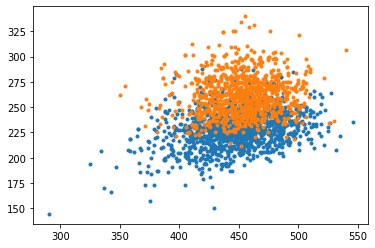

In [301]:
plt.plot(k.major_axis, k.minor_axis, ".")
plt.plot(s.major_axis, s.minor_axis, ".")

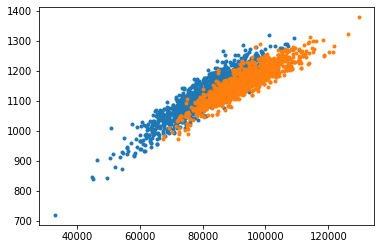

In [302]:
plt.plot(k.ellipse_area, k.ellipse_perimeter, ".")
plt.plot(s.ellipse_area, s.ellipse_perimeter, ".")

In [303]:
import seaborn as sns
df.columns

Index(['filename', 'filename_camelcase', 'pistachio_type', 'major_axis',
       'minor_axis', 'area', 'perimeter', 'ellipse_area', 'ellipse_perimeter',
       'major_axes', 'minor_axes', 'areas', 'perimeters', 'ellipse_areas',
       'ellipse_perimeters', 'shell_pixs_means', 'nut_pixs_means',
       'shell_pixs_meds', 'nut_pixs_meds', 'shell_r_means', 'shell_g_means',
       'shell_b_means', 'nut_r_means', 'nut_g_means', 'nut_b_means',
       'shell_r_meds', 'shell_g_meds', 'shell_b_meds', 'nut_r_meds',
       'nut_g_meds', 'nut_b_meds', 'n_shell_pixs_means', 'n_nut_pixs_means',
       'n_shell_pixs_meds', 'n_nut_pixs_meds', 'n_shell_r_means',
       'n_shell_g_means', 'n_shell_b_means', 'n_nut_r_means', 'n_nut_g_means',
       'n_nut_b_means', 'n_shell_r_meds', 'n_shell_g_meds', 'n_shell_b_meds',
       'n_nut_r_meds', 'n_nut_g_meds', 'n_nut_b_meds', 'shell_counts',
       'nut_counts', 'shell_h_means', 'shell_s_means', 'shell_v_means',
       'nut_h_means', 'nut_s_means', 'nut_v_mean

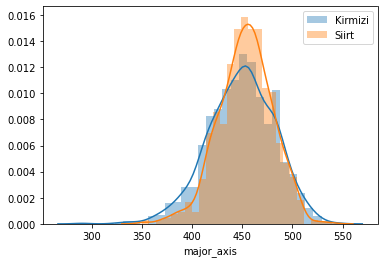

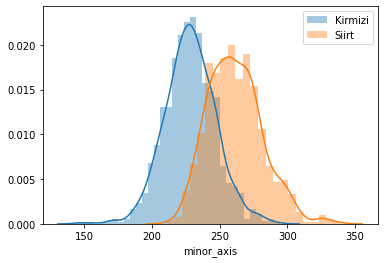

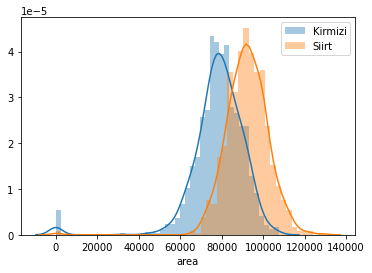

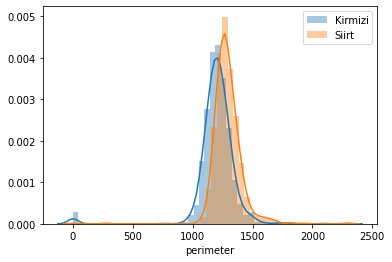

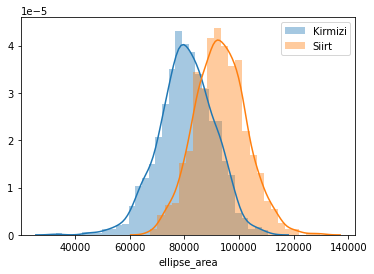

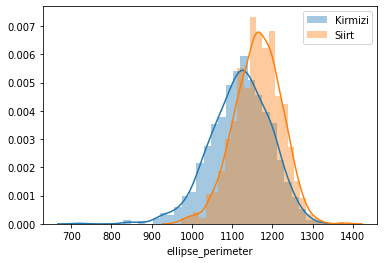

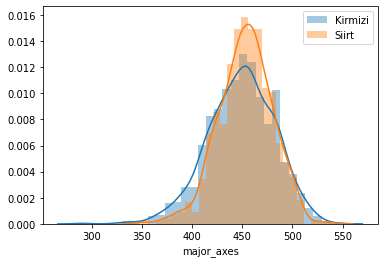

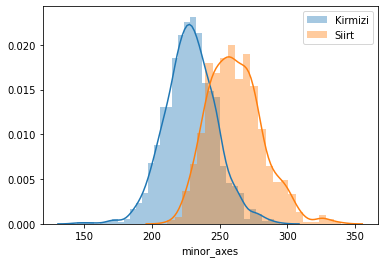

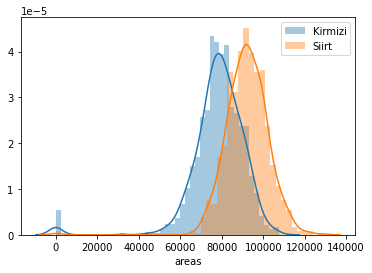

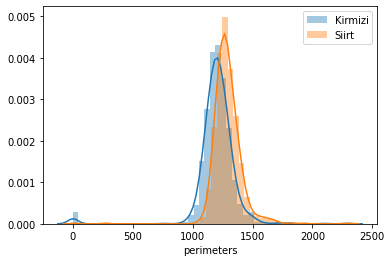

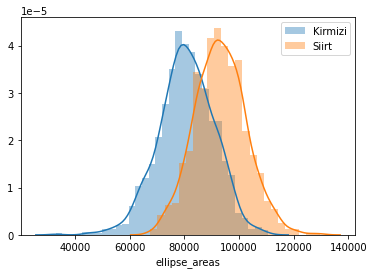

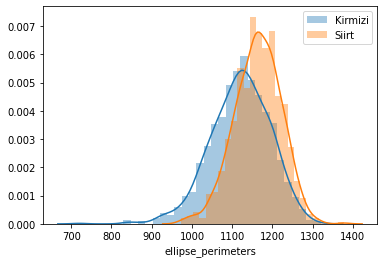

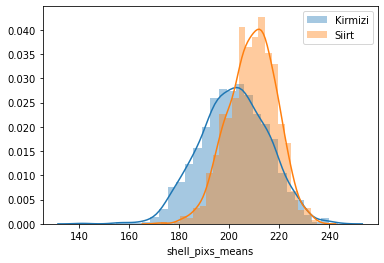

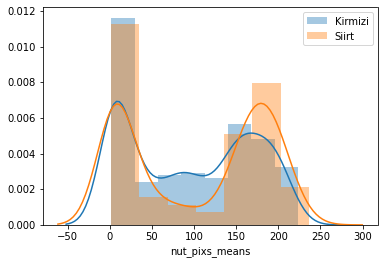

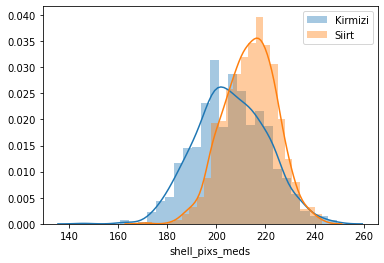

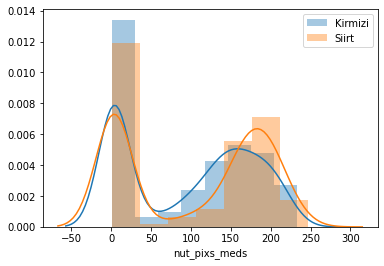

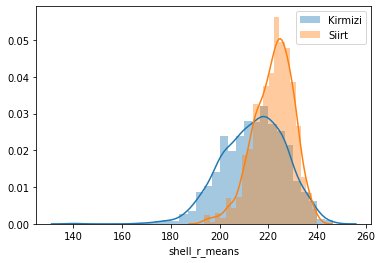

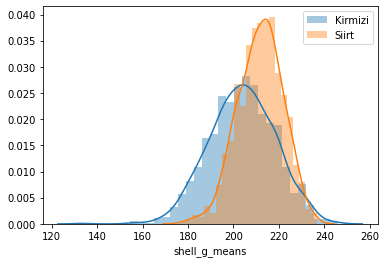

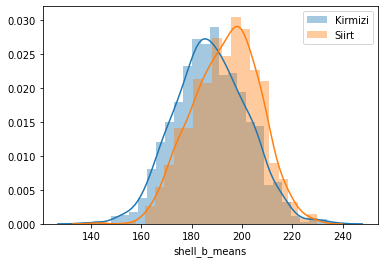

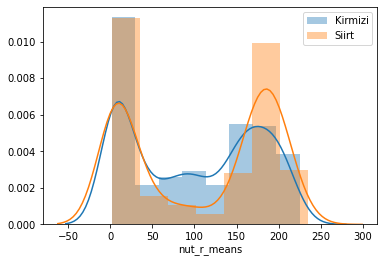

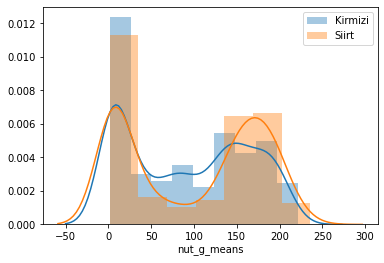

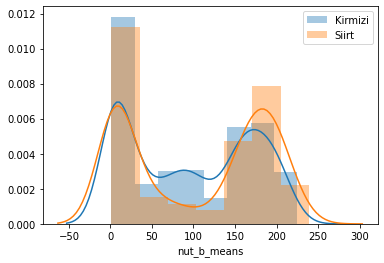

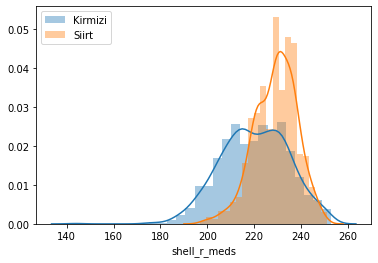

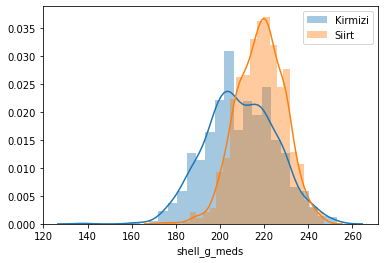

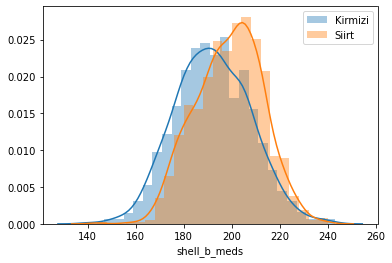

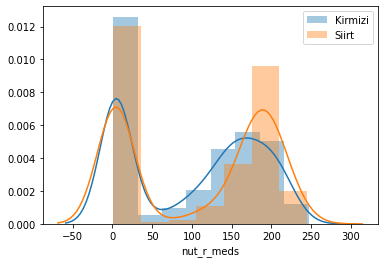

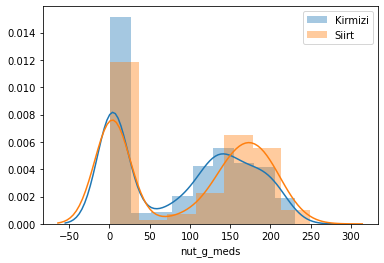

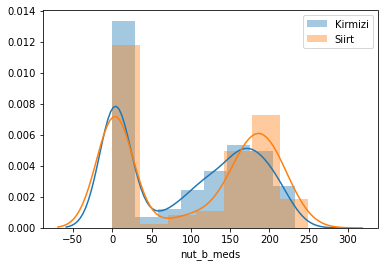

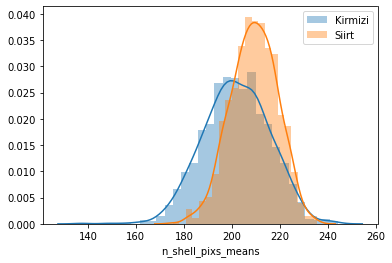

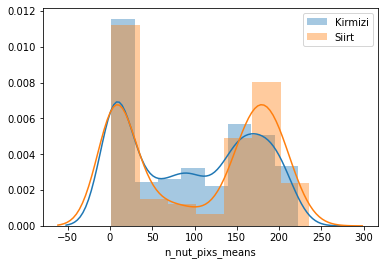

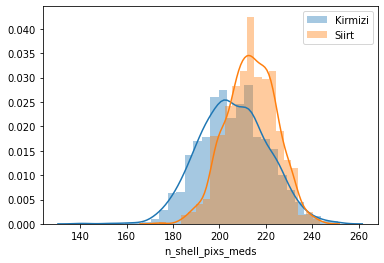

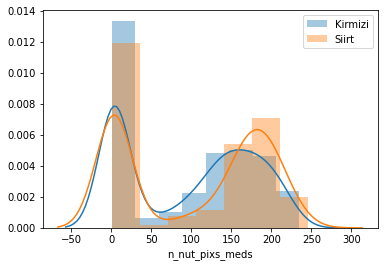

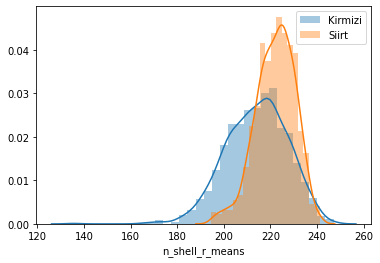

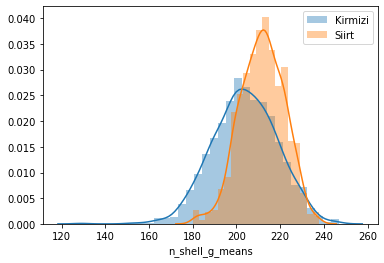

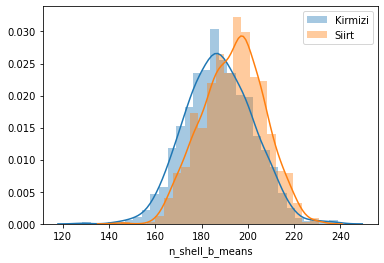

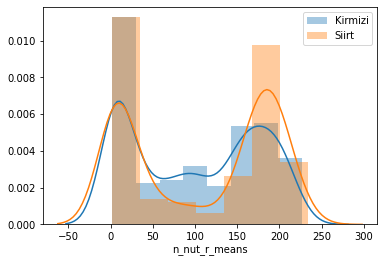

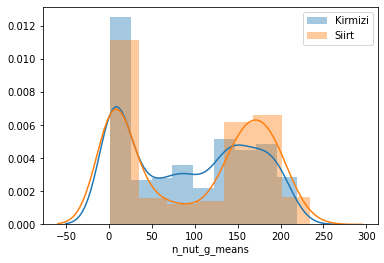

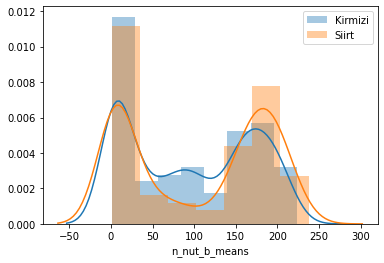

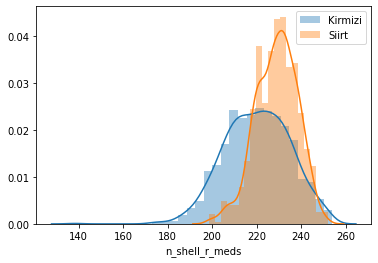

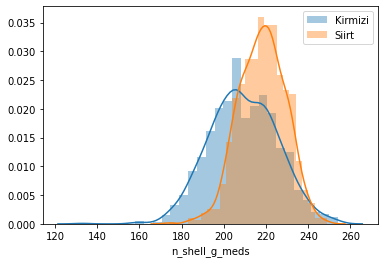

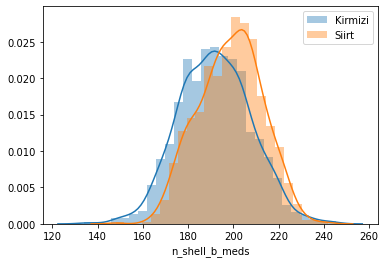

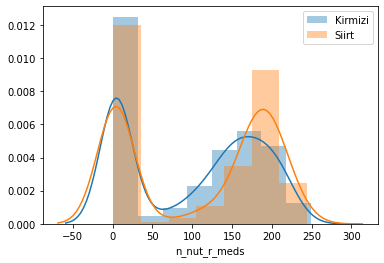

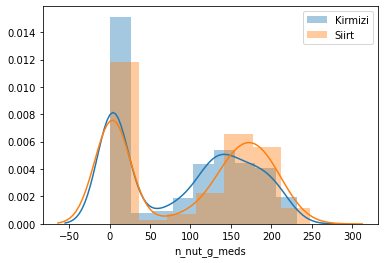

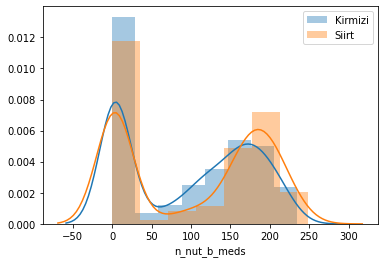

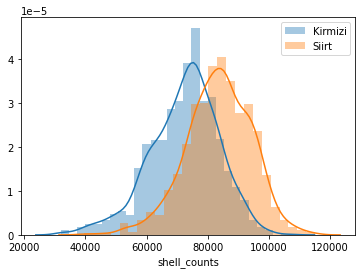

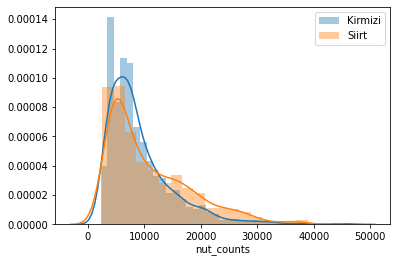

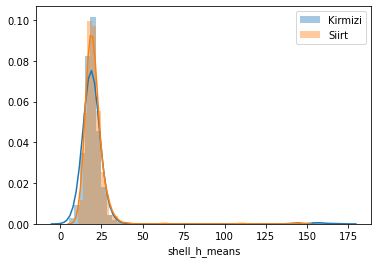

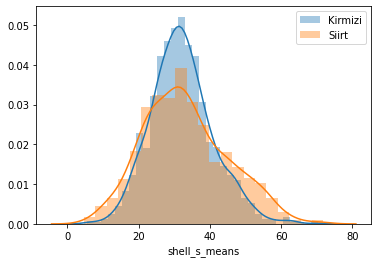

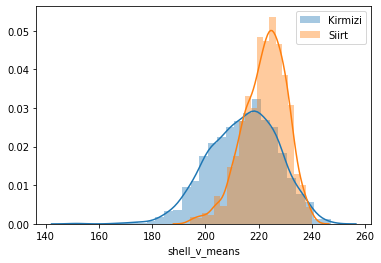

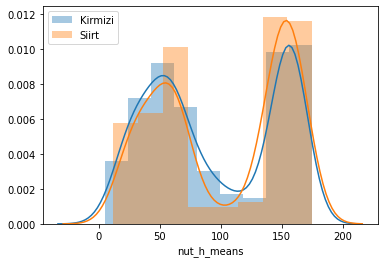

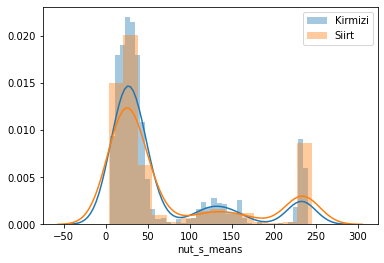

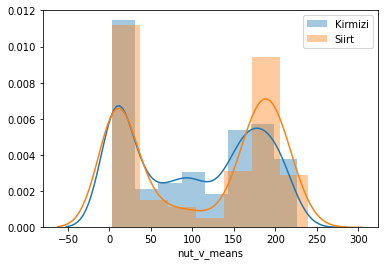

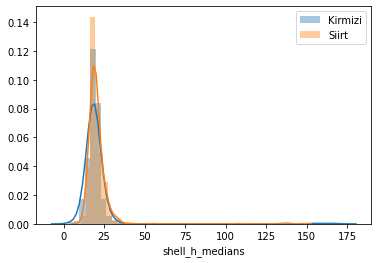

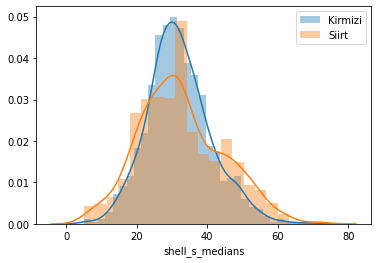

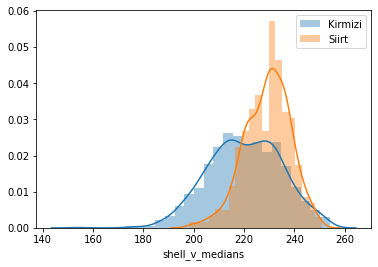

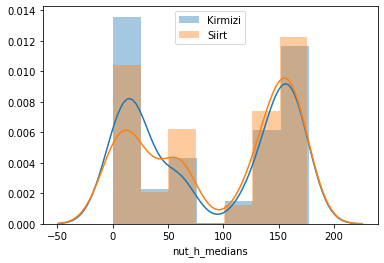

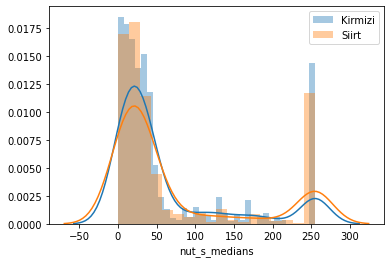

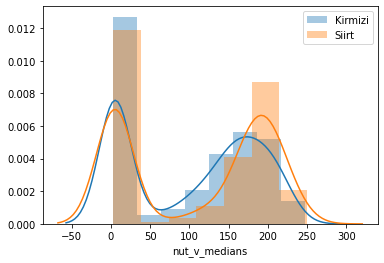

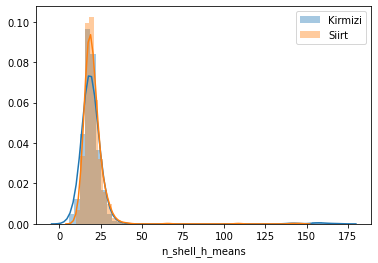

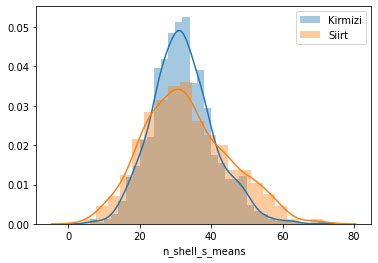

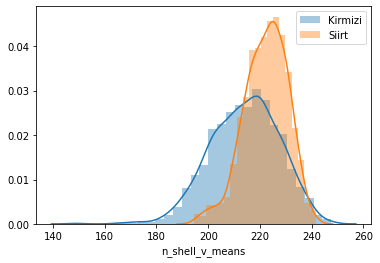

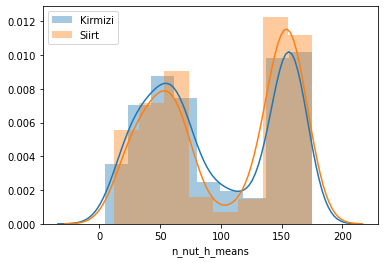

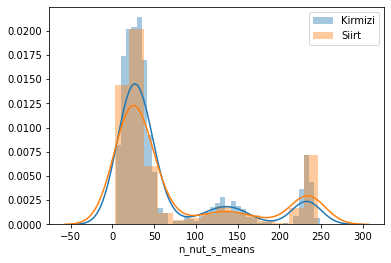

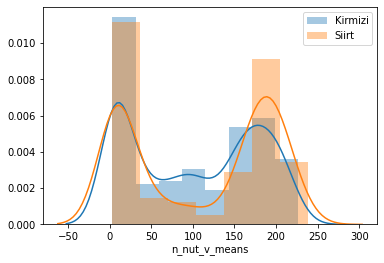

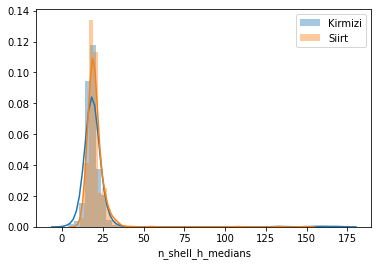

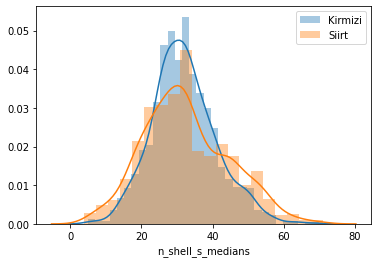

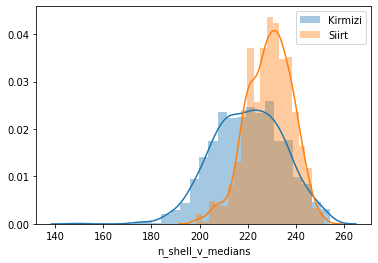

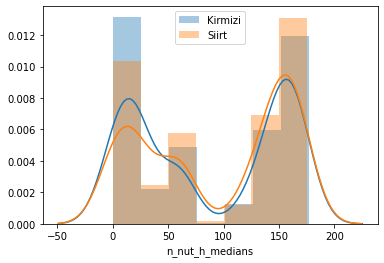

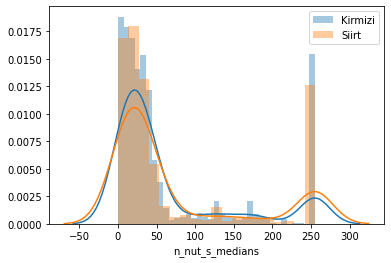

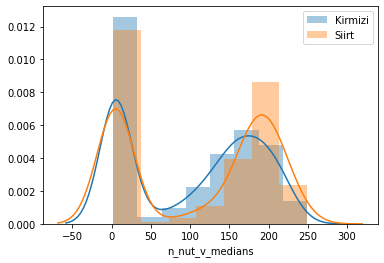

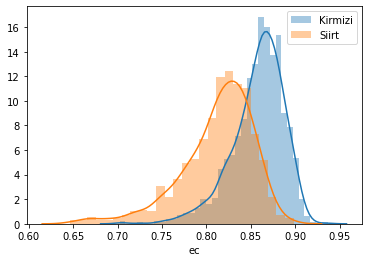

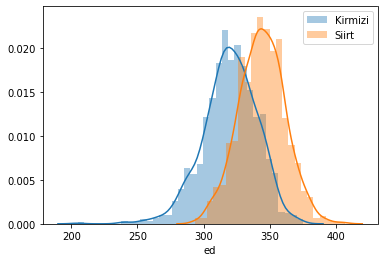

/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


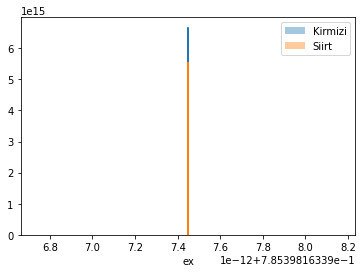

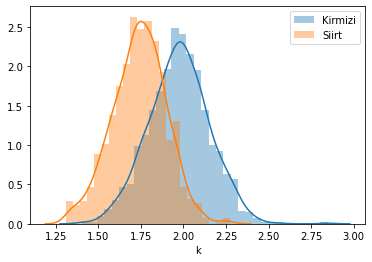

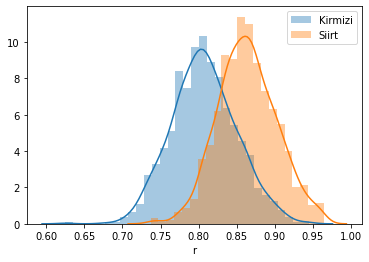

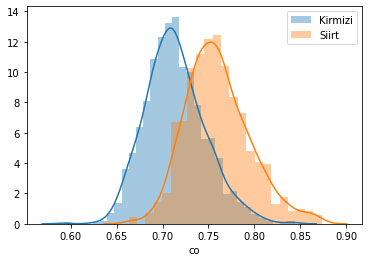

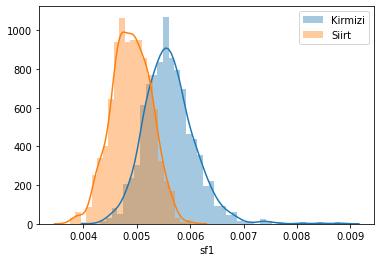

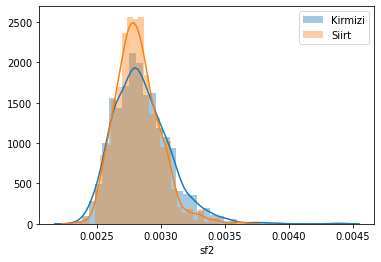

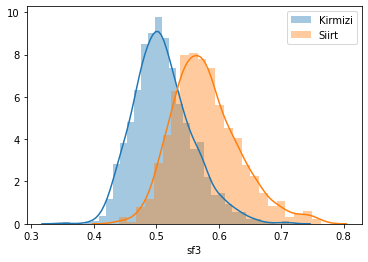

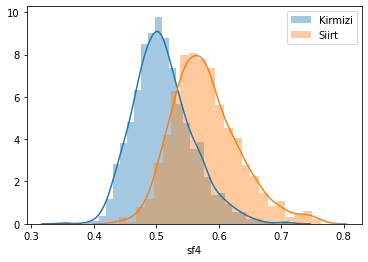

In [304]:
for c in df.columns[3:]:
    ax = sns.distplot(k[c], label="Kirmizi")
    sns.distplot(s[c], label="Siirt")
    plt.legend()
    plt.show()

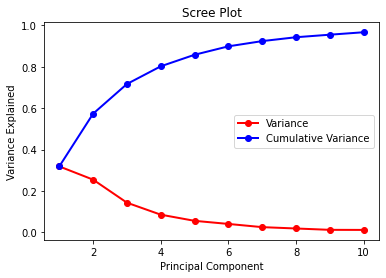

,filename,filename_camelcase,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter,major_axes,...,k,r,co,sf1,sf2,sf3,sf4,percent_area,distance_from_ellipse,average_hue
0,kirmizi (23).jpg,kirmizi_23.jpg,0,453.495544,220.994598,78732.0,1216.631593,78712.655547,1120.665639,453.495544,...,2.052066,0.787594,0.698079,0.005761,0.002808,0.487314,0.487314,0.240742,0.747299,104.021402
1,kirmizi 21.jpg,kirmizi_21.jpg,0,464.291748,248.325897,89545.0,1268.371705,90553.003463,1169.652914,464.291748,...,1.869687,0.831761,0.731334,0.005127,0.002742,0.534849,0.534849,0.271703,0.862266,108.530097
2,kirmizi 35.jpg,kirmizi_35.jpg,0,481.507446,219.244537,82487.0,1223.376759,82912.816940,1175.303335,481.507446,...,2.196212,0.754278,0.674781,0.005807,0.002644,0.455329,0.455329,0.246336,0.933590,103.808665
3,kirmizi 475.jpg,kirmizi_475.jpg,0,455.230591,236.374313,83621.5,1189.217379,84512.626684,1139.466757,455.230591,...,1.925889,0.817953,0.720584,0.005387,0.002797,0.519241,0.519241,0.252661,1.123648,106.372142
4,kirmizi 313.jpg,kirmizi_313.jpg,0,416.695648,225.598877,73160.5,1095.702659,73832.194933,1052.621353,416.695648,...,1.847064,0.837358,0.735799,0.005644,0.003056,0.541400,0.541400,0.224061,1.001319,105.179346


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("pistachios.csv", index_col=0)
scaler = StandardScaler()
X = scaler.fit_transform(df[df.columns[3:]])

#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit_transform(X)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red', label="Variance")
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='blue', label="Cumulative Variance")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()
df.head()

In [23]:
pca_fit.shape

(2148, 10)

In [29]:
import statsmodels.api as sm
X = pca_fit
y = df["pistachio_type"]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.307074
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.550    
Dependent Variable: pistachio_type   AIC:              1339.1913
Date:               2022-07-18 17:33 BIC:              1395.9142
No. Observations:   2148             Log-Likelihood:   -659.60  
Df Model:           9                LL-Null:          -1465.6  
Df Residuals:       2138             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       0.0906     0.0142     6.3864   0.0000    0.0628    0.1184
x2      -0.4527     0.0231   -19.6295   0.0000   -0.4979   -0.4075
x3      -0.5723     0.0301   -19.0244   0.0000   -0.6313   -0.5133
x4       0.4881     0.0318    15.3659   0.0000    0.4259    0.5504
x5       0.1854     0.0324     5.7191   0.0000    0.1219    0.2489
x6       0.0384     0.0380     1.0097   0.3126   -0.0361    0.1129
x7      -0.0457     0.0482    -0.9490   0.3426   -0.1402    0.0487
x8       0.0329     0.0597     0.5521   0.5809   -0.0840    0.1499
x9      -0.9759     0.0773   -12.6205   0.0000   -1.1275   -0.8244
x10      0.7404     0.0759     9.7483   0.0000    0.5915    0.8892
================================================================

"""

In [39]:
# X = np.stack((pca_fit[:, :5], pca_fit[:, -2:]), axis=1)
X = np.zeros((pca_fit.shape[0], pca_fit.shape[1] - 3))
X[:, :5] = pca_fit[:, :5]
X[:, -2:] = pca_fit[:, -2:]
X.shape

(2148, 7)

In [40]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.307579
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.549    
Dependent Variable: pistachio_type   AIC:              1335.3592
Date:               2022-07-18 17:37 BIC:              1375.0652
No. Observations:   2148             Log-Likelihood:   -660.68  
Df Model:           6                LL-Null:          -1465.6  
Df Residuals:       2141             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       0.0912     0.0142     6.4332   0.0000    0.0634    0.1189
x2      -0.4514     0.0230   -19.6398   0.0000   -0.4965   -0.4064
x3      -0.5712     0.0300   -19.0459   0.0000   -0.6300   -0.5125
x4       0.4881     0.0318    15.3666   0.0000    0.4258    0.5503
x5       0.1875     0.0339     5.5346   0.0000    0.1211    0.2539
x6      -0.9707     0.0770   -12.6066   0.0000   -1.1216   -0.8197
x7       0.7396     0.0758     9.7612   0.0000    0.5911    0.8881
================================================================

"""

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.88
[[337  37]
 [ 42 229]]


/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
logreg.score(X, y)

0.8817504655493482

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.sum(), y_test.sum()

(1503, 7) (645, 7) (1503,) (645,)


(645, 271)

In [2]:
# ignore all below
import pandas as pd
check = pd.read_excel("../Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx")
check.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

model = LogisticRegression()
X = check[check.columns[:-1]]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = check["Class"]

In [13]:
model.fit(X_scaled, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]
})
importances["Importance"] = pd.np.abs(importances["Importance"])
importances = importances.sort_values(by='Importance', ascending=False)
importances

/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Attribute,Importance
19,StdDev_RR,5.560778
16,Mean_RR,3.730967
9,Aspect_Ratio,3.662814
26,Kurtosis_RG,3.245012
25,Kurtosis_RR,2.963614
14,Shapefactor_3,2.922480
4,Eccentricity,2.714083
0,Area,2.661083
27,Kurtosis_RB,2.643941
11,Compactness,2.628424


Loss Functions and Optimizers


With $D$ and $G$ setup, we can specify how they learn
through the loss functions and optimizers. We will use the Binary Cross
Entropy loss
(`BCELoss <https://pytorch.org/docs/stable/nn.html#torch.nn.BCELoss>`__)
function which is defined in PyTorch as:

\begin{align}\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = - \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right]\end{align}

Notice how this function provides the calculation of both log components
in the objective function (i.e. $log(D(x))$ and
$log(1-D(G(z)))$). We can specify what part of the BCE equation to
use with the $y$ input. This is accomplished in the training loop
which is coming up soon, but it is important to understand how we can
choose which component we wish to calculate just by changing $y$
(i.e. GT labels).

Next, we define our real label as 1 and the fake label as 0. These
labels will be used when calculating the losses of $D$ and
$G$, and this is also the convention used in the original GAN
paper. Finally, we set up two separate optimizers, one for $D$ and
one for $G$. As specified in the DCGAN paper, both are Adam
optimizers with learning rate 0.0002 and Beta1 = 0.5. For keeping track
of the generator’s learning progression, we will generate a fixed batch
of latent vectors that are drawn from a Gaussian distribution
(i.e. fixed_noise) . In the training loop, we will periodically input
this fixed_noise into $G$, and over the iterations we will see
images form out of the noise.

Training


Finally, now that we have all of the parts of the GAN framework defined,
we can train it. Be mindful that training GANs is somewhat of an art
form, as incorrect hyperparameter settings lead to mode collapse with
little explanation of what went wrong. Here, we will closely follow
Algorithm 1 from Goodfellow’s paper, while abiding by some of the best
practices shown in `ganhacks <https://github.com/soumith/ganhacks>`__.
Namely, we will “construct different mini-batches for real and fake”
images, and also adjust G’s objective function to maximize
$logD(G(z))$. Training is split up into two main parts. Part 1
updates the Discriminator and Part 2 updates the Generator.

**Part 1 - Train the Discriminator**

Recall, the goal of training the discriminator is to maximize the
probability of correctly classifying a given input as real or fake. In
terms of Goodfellow, we wish to “update the discriminator by ascending
its stochastic gradient”. Practically, we want to maximize
$log(D(x)) + log(1-D(G(z)))$. Due to the separate mini-batch
suggestion from ganhacks, we will calculate this in two steps. First, we
will construct a batch of real samples from the training set, forward
pass through $D$, calculate the loss ($log(D(x))$), then
calculate the gradients in a backward pass. Secondly, we will construct
a batch of fake samples with the current generator, forward pass this
batch through $D$, calculate the loss ($log(1-D(G(z)))$),
and *accumulate* the gradients with a backward pass. Now, with the
gradients accumulated from both the all-real and all-fake batches, we
call a step of the Discriminator’s optimizer.

**Part 2 - Train the Generator**

As stated in the original paper, we want to train the Generator by
minimizing $log(1-D(G(z)))$ in an effort to generate better fakes.
As mentioned, this was shown by Goodfellow to not provide sufficient
gradients, especially early in the learning process. As a fix, we
instead wish to maximize $log(D(G(z)))$. In the code we accomplish
this by: classifying the Generator output from Part 1 with the
Discriminator, computing G’s loss *using real labels as GT*, computing
G’s gradients in a backward pass, and finally updating G’s parameters
with an optimizer step. It may seem counter-intuitive to use the real
labels as GT labels for the loss function, but this allows us to use the
$log(x)$ part of the BCELoss (rather than the $log(1-x)$
part) which is exactly what we want.

Finally, we will do some statistic reporting and at the end of each
epoch we will push our fixed_noise batch through the generator to
visually track the progress of G’s training. The training statistics
reported are:

-  **Loss_D** - discriminator loss calculated as the sum of losses for
   the all real and all fake batches ($log(D(x)) + log(1 - D(G(z)))$).
-  **Loss_G** - generator loss calculated as @@11@@
-  **D(x)** - the average output (across the batch) of the discriminator
   for the all real batch. This should start close to 1 then
   theoretically converge to 0.5 when G gets better. Think about why
   this is.
-  **D(G(z))** - average discriminator outputs for the all fake batch.
   The first number is before D is updated and the second number is
   after D is updated. These numbers should start near 0 and converge to
   0.5 as G gets better. Think about why this is.

**Note:** This step might take a while, depending on how many epochs you
run and if you removed some data from the dataset.